# Stochastic Coagulation-Fragmentation Dynamics
$$
\def\n{\mathbf{n}}
\def\x{\mathbf{x}}
\def\N{\mathbb{\mathbb{N}}}
\def\X{\mathbb{X}}
\def\NX{\mathbb{\N_0^\X}}
\def\C{\mathcal{C}}
\def\Jc{\mathcal{J}_c}
\def\DM{\Delta M_{c,j}}
\newcommand\diff{\mathop{}\!\mathrm{d}}
\def\Xc{\mathbf{X}_c}
\def\Yc{\mathbf{Y}_c}
\newcommand{\muset}[1]{\dot{\{}#1\dot{\}}}
$$

In [1]:
# initialize sympy printing (for latex output)
from sympy import init_printing
init_printing()

# import functions and classes for compartment models
from compartments import *
from compartments_display import *

## Specifying the reaction network

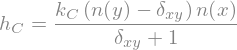

In [2]:
from coagulation_fragmentation import D, transitions
display_transitions(transitions)

## Deriving expected moment dynamics

Next we specify the moments we want to derive, for example, $N$, $N^2$, $M^1$, and $(M^1)^2$.

To denote a particular moment, use the `Moment` class. It takes as constructor arguments the integer exponents in each species.

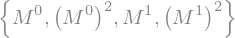

In [3]:
moments = {
    Moment(0),
    Moment(0)**2,
    Moment(1),
    Moment(1)**2
}
display(moments)

Then call the function `compute_moment_evolutions()`, giving the reaction network, the desired moment expressions, and the number of species.

In [4]:
(evolutions, missing) = compute_moment_evolutions(transitions, moments, D)

The result is a pair `(evolutions, missing)`.

`evolutions` are the expressions for the expectation of the desired moment expressions.
`evolutions` is a list of pairs `(fM, dfMdt)`, where each pair consists of the desired moment expression, and the derived expression for its derivative by $t$.

`missing` is a set of moment expressions that are reuired in the derivatives, but are not known yet (not listed in desired `moments`).

To display the derived evolutions, use the `display_expected_moment_evolutions()` function.

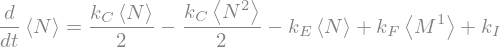

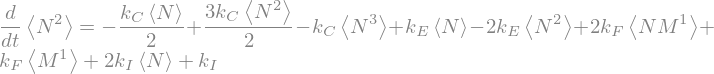

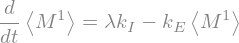

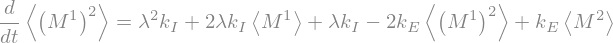

In [5]:
display_expected_moment_evolutions(evolutions)

The missing moment expressions occuring in these equations are `missing`.

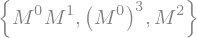

In [6]:
missing

Now, we can iterate the process to also get these moments.

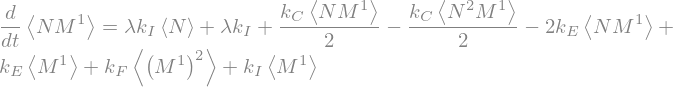

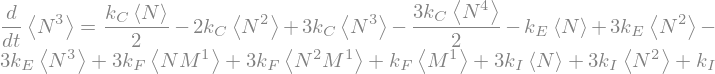

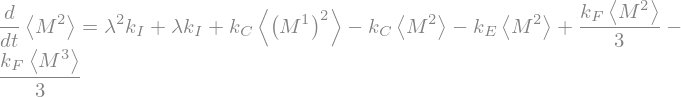

In [7]:
(evolutions2, missing2) = compute_moment_evolutions(transitions, missing, D, provided=moments)
display_expected_moment_evolutions(evolutions2)

We get more missing moment expressions

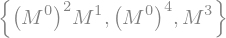

In [8]:
missing2

We can iterate up to the desired order of moments and then apply moment closure.
### TODO